In [1]:
import sys
sys.path.append('..')

import src as odyn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, shape
from pyproj import Proj

## Load Probabilities

Load geographic and hesitancy data for Multnomah County, Oregon.

In [2]:
county = "Multnomah"
state = "OR"

In [3]:
geo_df = odyn.get_county_mapping_data(county = county, state = state)
hesitancy_dict = odyn.get_hesitancy_dict(geo_df)
prob = list(hesitancy_dict.values())
geo_df

,county,state,area (km^2),population (2019),density,geometry,strongly_hesitant,hesitant_or_unsure,not_hesitant
0,Multnomah,OR,1204.149321,812855,675.045018,"POLYGON ((-13684416.638 5733587.657, -13684416...",0.0677,0.0492,0.8831


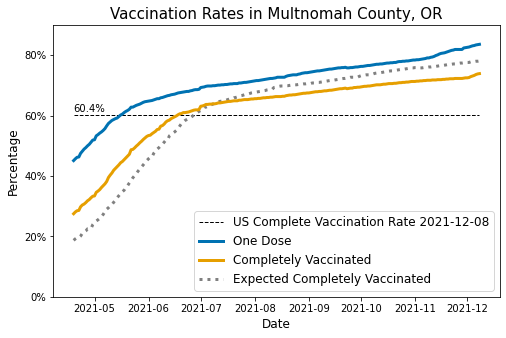

In [4]:
odyn.vaccine_trends_plot(county = county, 
                        state = state, 
                        show_us_current = True,
                        download_data = False)

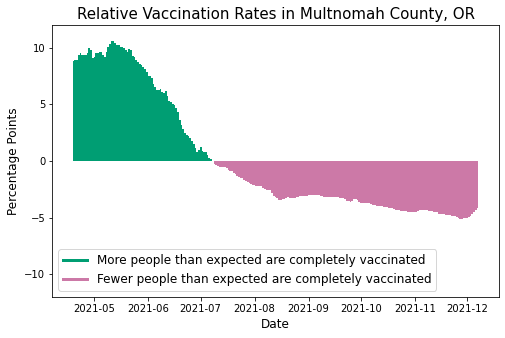

In [5]:
odyn.relative_vaccine_trends_plot(county = county, 
                        state = state, 
                        download_data = False)

## Triangulate and Populate County

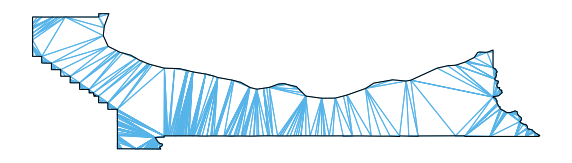

In [6]:
odyn.plot_triangulated_county(geo_df)

In [ ]:
bounding_box = [[-121.965, 45.62], 
                [-121.92, 45.62], 
                [-121.92, 45.65], 
                [-121.965, 45.65], 
                [-121.965, 45.62]]

odyn.plot_triangulated_county(geo_df, 
                              bounding_box = bounding_box, 
                              restricted = False,
                              aspect_ratio =1)

NameError: name 'odyn' is not defined

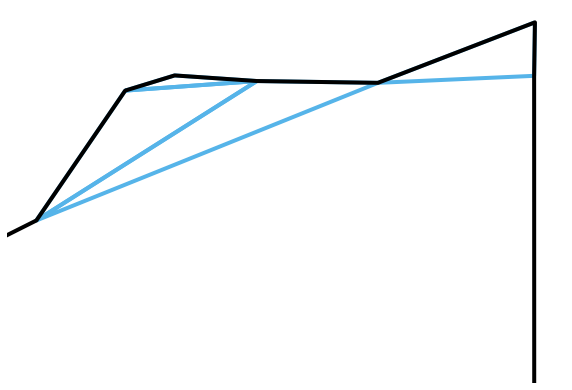

In [8]:
odyn.plot_triangulated_county(geo_df, 
                              bounding_box = bounding_box, 
                              restricted = True,
                              aspect_ratio =1)

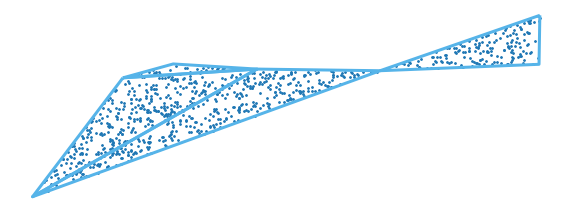

In [9]:
model = odyn.OpinionNetworkModel(probabilities = prob)
agent_df = model.add_random_agents_to_triangles( 
                                        geo_df, 
                                        bounding_box = bounding_box,
                                        show_plot = True)


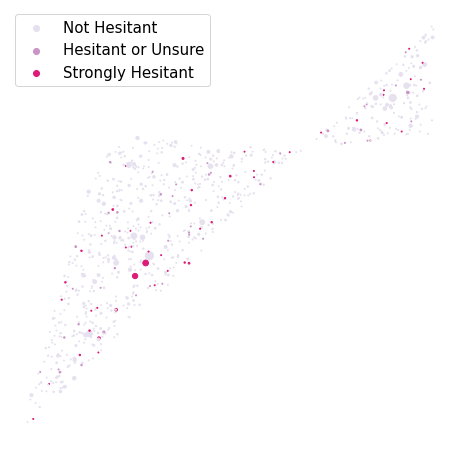

In [10]:
belief_df = model.assign_weights_and_beliefs(agent_df, show_plot = True)

In [11]:
# THIS WILL TAKE A FEW MOMENTS.
model = odyn.OpinionNetworkModel(probabilities = prob,
                                include_weight = True,
                                include_opinion = True,
                                importance_of_weight = 0.05,
                                importance_of_distance = 9)
model.populate_model(geo_df = geo_df, 
                     bounding_box = bounding_box)

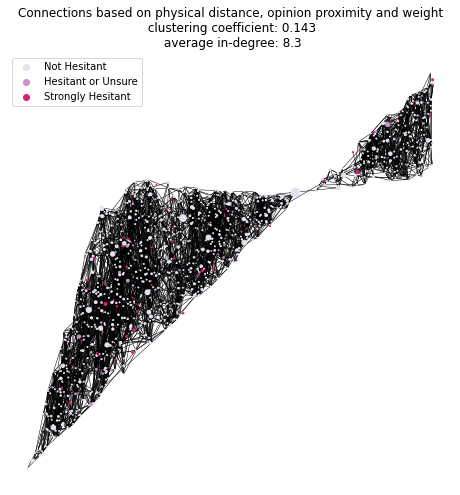

In [12]:
model.plot_initial_network()

In [13]:
# THIS WILL TAKE A FEW MOMENTS.
model = odyn.OpinionNetworkModel(probabilities = [.45,.1,.45])
model.populate_model(num_agents = 1000)

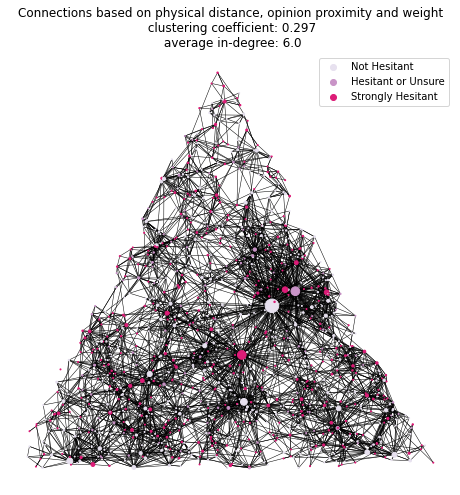

In [14]:
model.plot_initial_network()

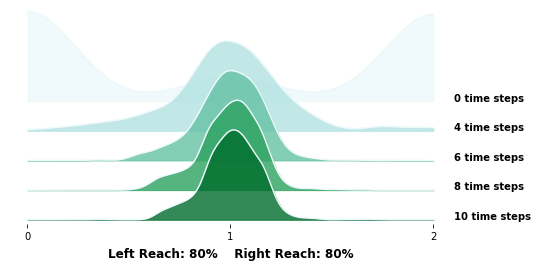

In [17]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model,
                   # phases = 5
                  )
sim.plot_simulation_results()